In [ ]:
!pip install ultralytics

import ultralytics
ultralytics.checks()

Ultralytics 8.3.15 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.2/112.6 GB disk)


In [ ]:
!pip install roboflow

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="JAXf7t7YPeQSpEnZozBo")
project = rf.workspace("brain-mri").project("mri-rskcu")
version = project.version(3)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to MRI-3 in yolov8:: 100%|██████████| 2015/2015 [00:00<00:00, 3143.22it/s]


In [ ]:
!ls {dataset.location}

data.yaml  README.dataset.txt  README.roboflow.txt  train  valid


In [ ]:
import torch
from ultralytics import YOLO

model = YOLO("yolov10n.pt")

100%|██████████| 5.59M/5.59M [00:00<00:00, 136MB/s]


In [ ]:
!yolo task=detect mode=train epochs = 25, batch=32 plots=True \
model = '/content/yolov10n.pt' \
data = '/content/MRI-3/data.yaml'

WARNING ⚠️ argument 'epochs=25,' does not require trailing comma ',', updating to 'epochs=25'.
Ultralytics 8.3.15 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/yolov10n.pt, data=/content/MRI-3/data.yaml, epochs=25, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fram

In [ ]:
from ultralytics import YOLO

model_path = '/content/runs/detect/train/weights/best.pt'
model = YOLO(model_path)

result = model(source = "/content/MRI-3/valid/images", conf = 0.25, save=True)


image 1/151 /content/MRI-3/valid/images/Tr-glTr_0000_jpg.rf.ee4ad3ca5d0eafd1f482988b89457634.jpg: 640x640 (no detections), 12.3ms
image 2/151 /content/MRI-3/valid/images/Tr-gl_0021_jpg.rf.82e37d9cdf73ab894e8af3cd4bfb70a8.jpg: 640x640 1 Brain-Tumor, 9.9ms
image 3/151 /content/MRI-3/valid/images/Tr-gl_0119_jpg.rf.0768b25ee8d4e0aa20df53673dce853e.jpg: 640x640 1 Brain-Tumor, 9.8ms
image 4/151 /content/MRI-3/valid/images/Tr-gl_0228_jpg.rf.b9ecef834d39f770e41b0585b63bdc1a.jpg: 640x640 1 Brain-Tumor, 9.5ms
image 5/151 /content/MRI-3/valid/images/Tr-gl_0342_jpg.rf.10e62693351dae5f8b8f0e136c8ec8c3.jpg: 640x640 2 eyes, 9.7ms
image 6/151 /content/MRI-3/valid/images/Tr-gl_0493_jpg.rf.4393a755ad877b333ee635f7d8625687.jpg: 640x640 1 Brain-Tumor, 10.0ms
image 7/151 /content/MRI-3/valid/images/Tr-gl_0565_jpg.rf.4975825d65539d7d35caf0f61517f236.jpg: 640x640 2 Brain-Tumors, 9.8ms
image 8/151 /content/MRI-3/valid/images/Tr-gl_0585_jpg.rf.eeb0b7c0f19a6763494b9e53fee546db.jpg: 640x640 1 Brain-Tumor, 9.8ms

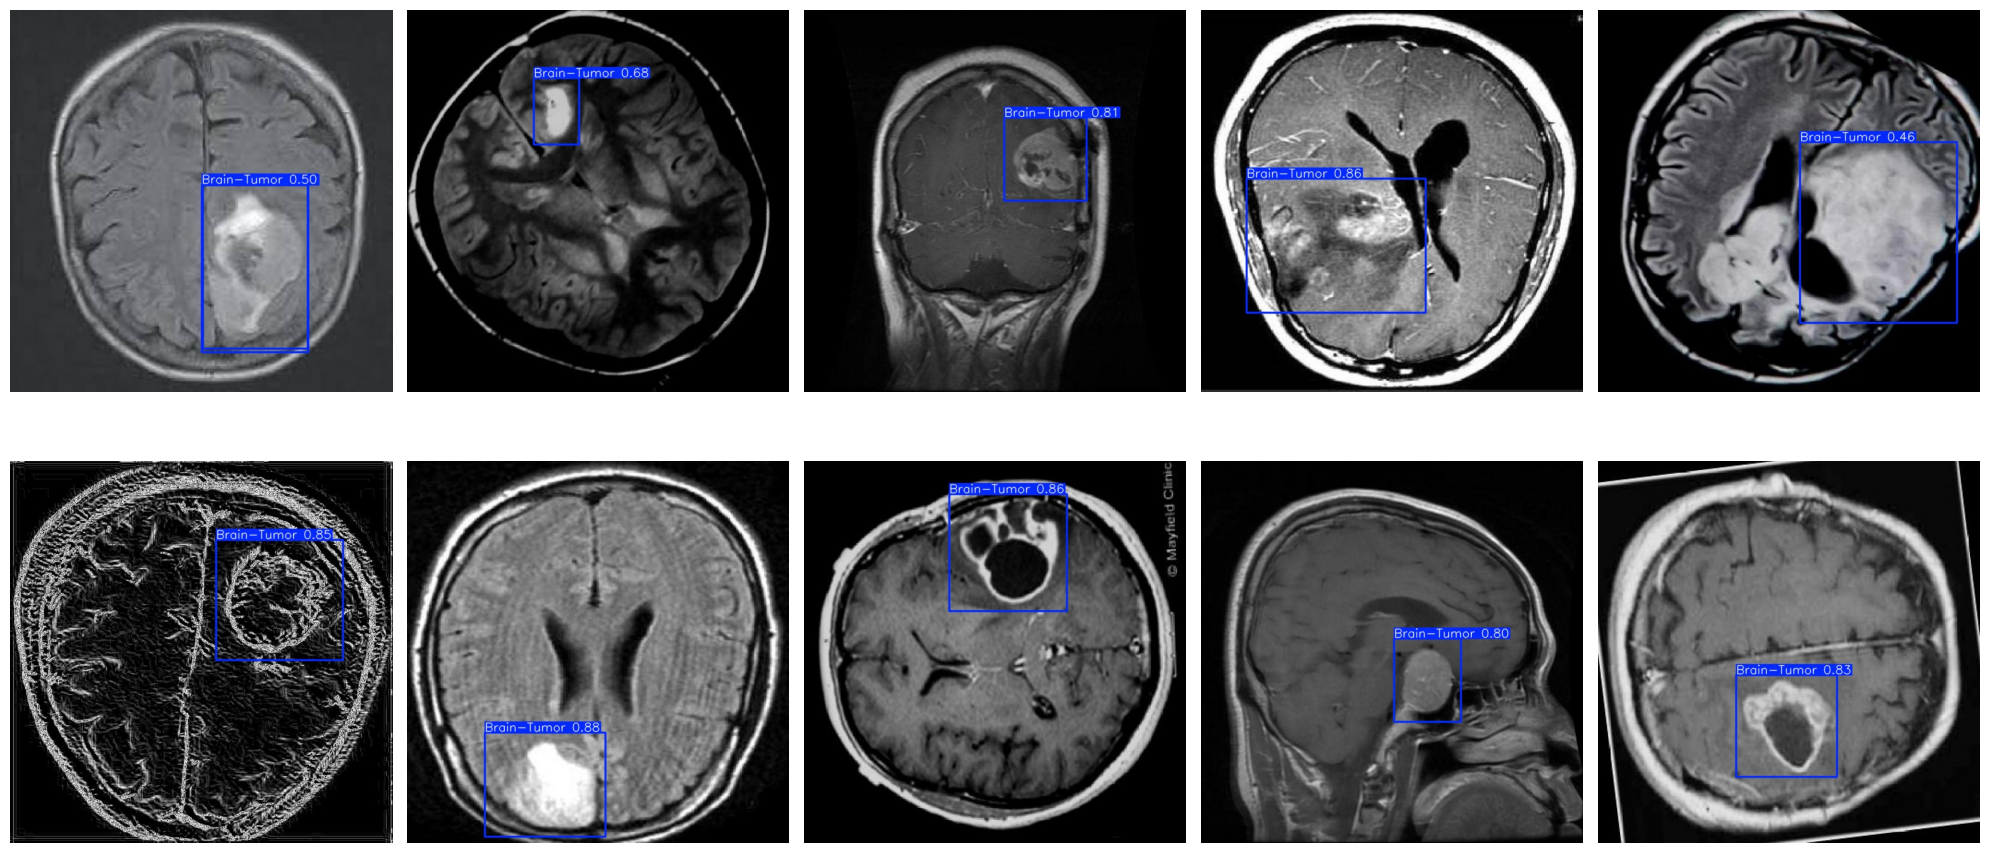

In [ ]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

images = glob.glob('/content/runs/detect/predict/*.jpg')

images_to_display = images[:10]

fig, axes = plt.subplots(2,5, figsize=(20,10))

for i, ax in enumerate(axes.flat):
  if i< len(images_to_display):
    img = mpimg.imread(images_to_display[i])
    ax.imshow(img)
    ax.axis('off')
  else:
    ax.axis('off')
plt.tight_layout()
plt.show()


image 1/1 /content/MRI-3/valid/images/Tr-gl_0119_jpg.rf.0768b25ee8d4e0aa20df53673dce853e.jpg: 640x640 1 Brain-Tumor, 24.2ms
Speed: 2.3ms preprocess, 24.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
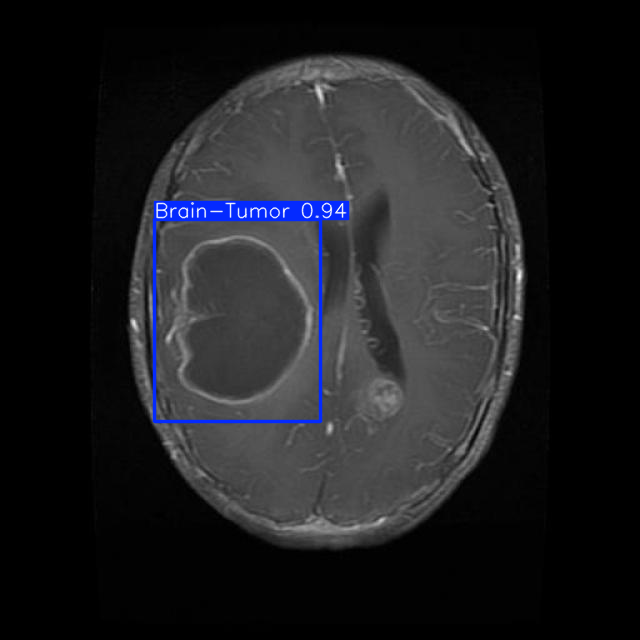

In [ ]:
result = model.predict(source = "/content/MRI-3/valid/images/Tr-gl_0119_jpg.rf.0768b25ee8d4e0aa20df53673dce853e.jpg")
annotated_img = result[0].plot()
annotated_img[:, :, ::-1]

In [ ]:
model.save('/content/yolov10_model.pt')

In [ ]:
pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.4/447.4 kB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 85.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/1

In [ ]:
import gradio as gr
import cv2
import numpy as no

def predict(image):
  result = model.predict(source = image)
  annotated_img = result[0].plot()
  annotated_img[:, :, ::-1]
  return annotated_img

app = gr.Interface(
    fn = predict,
    inputs = gr.Image(type = "numpy", label = "Upload an image"),
    outputs = gr.Image(type = "numpy", label = "Detect Brain Tumor"),
    title = "Brain Tumor Detection Using YOLOv10",
    description = "Upload the image and the YOLOv10 model will detect brain tumor"
)
app.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://763e30365582241b61.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
